In [ ]:
!pip install compress-fasttext > /dev/null

In [ ]:
!gdown 13ZkrYeq_tZW_yTGzBYh-nHScsLk8nWa8

Downloading...
From: https://drive.google.com/uc?id=13ZkrYeq_tZW_yTGzBYh-nHScsLk8nWa8
To: /content/train.csv
100% 29.8M/29.8M [00:00<00:00, 65.6MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,pair_id,name_1,name_2,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0
3,4,Powermax Rubber Factory,Co. One,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0


In [ ]:
len(df)

497819

In [ ]:
df[df["is_duplicate"] == 0]

,pair_id,name_1,name_2,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0
3,4,Powermax Rubber Factory,Co. One,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0
...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0


In [ ]:
df[(df["is_duplicate"] == 1) & (df["name_1"] != df["name_2"])]

,pair_id,name_1,name_2,is_duplicate
161,162,JX Nippon Oil & Gas Exploration (Brasil) Ltda,JX Nippon Oil & Gas Exploration Technical Serv...,1
603,604,Pirelli Neumaticos S.A.I.C.,"Pirelli Tyre Co., Ltd.",1
835,836,Brenntag Australia (Pty) Ltd.,Brenntag Group,1
1328,1329,"PAUL BAUDER GMBH & CO KG, BOCHUM PLANT",Paul Bauder ag,1
1562,1563,TOTAL CESKA REPUBLIKA s.r.o.,TOTAL FRANCE (ARNAY LE DUC),1
...,...,...,...,...
496574,496575,"Bridgestone （Huizhou）Synthetic Rubber Co., Ltd.","Bridgestone India Pvt., Ltd.",1
496760,496761,Arlanxeo International Group,Arlanxeo Corp.,1
497015,497016,Brenntag Peru S.A.C.,Brenntag Chile Comercial E Industrial Ltda,1
497083,497084,Dow Chemical International Private Ltd.,Dow Chemical Pacific,1


In [ ]:
non_ascii = "[^\x00-\x7F]"
df[~(((df["name_1"].str.contains(non_ascii) | df["name_2"].str.contains(non_ascii))))]

,pair_id,name_1,name_2,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0
3,4,Powermax Rubber Factory,Co. One,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0
...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0


In [ ]:
df[df.isna().any(axis=1)]

,pair_id,name_1,name_2,is_duplicate


In [ ]:
df[df.isnull().any(axis=1)]

,pair_id,name_1,name_2,is_duplicate


In [ ]:
df[df["name_1"] == df["name_2"]]

,pair_id,name_1,name_2,is_duplicate
5117,5118,"ООО""ИМПОРТ МОДА""","ООО""ИМПОРТ МОДА""",1
12160,12161,"ООО""ГУЧЧИ РУС""","ООО""ГУЧЧИ РУС""",1
14857,14858,Lohmann GmbH & Co. KG,Lohmann GmbH & Co. KG,1
25949,25950,"ООО""ПРИВАТ ТРЭЙД""","ООО""ПРИВАТ ТРЭЙД""",1
38345,38346,"ООО""СПЕЦИАЛЬНОЕ ОБОРУДОВАНИЕ""","ООО""СПЕЦИАЛЬНОЕ ОБОРУДОВАНИЕ""",1
139209,139210,"ООО""ФАВОРИТ СТАЙЛ","ООО""ФАВОРИТ СТАЙЛ",1
150207,150208,"ООО""ОЗОН ГИЙИМ РСЙ""","ООО""ОЗОН ГИЙИМ РСЙ""",1
151690,151691,"ООО ""ХИММАРКЕТ""","ООО ""ХИММАРКЕТ""",1
169770,169771,"ООО""ВЕРТИКАЛЬ СПОРТ""","ООО""ВЕРТИКАЛЬ СПОРТ""",1
226434,226435,"ООО ""СТАРКОМ""","ООО ""СТАРКОМ""",1


In [ ]:
df[df["name_1"].str.lower() == df["name_2"].str.lower()]

,pair_id,name_1,name_2,is_duplicate
5117,5118,"ООО""ИМПОРТ МОДА""","ООО""ИМПОРТ МОДА""",1
12160,12161,"ООО""ГУЧЧИ РУС""","ООО""ГУЧЧИ РУС""",1
14857,14858,Lohmann GmbH & Co. KG,Lohmann GmbH & Co. KG,1
25949,25950,"ООО""ПРИВАТ ТРЭЙД""","ООО""ПРИВАТ ТРЭЙД""",1
38345,38346,"ООО""СПЕЦИАЛЬНОЕ ОБОРУДОВАНИЕ""","ООО""СПЕЦИАЛЬНОЕ ОБОРУДОВАНИЕ""",1
139209,139210,"ООО""ФАВОРИТ СТАЙЛ","ООО""ФАВОРИТ СТАЙЛ",1
150207,150208,"ООО""ОЗОН ГИЙИМ РСЙ""","ООО""ОЗОН ГИЙИМ РСЙ""",1
151690,151691,"ООО ""ХИММАРКЕТ""","ООО ""ХИММАРКЕТ""",1
169770,169771,"ООО""ВЕРТИКАЛЬ СПОРТ""","ООО""ВЕРТИКАЛЬ СПОРТ""",1
226434,226435,"ООО ""СТАРКОМ""","ООО ""СТАРКОМ""",1


In [ ]:
df[(df["is_duplicate"] == 1) & df["name_1"].str.contains('"')]

,pair_id,name_1,name_2,is_duplicate
5117,5118,"ООО""ИМПОРТ МОДА""","ООО""ИМПОРТ МОДА""",1
12160,12161,"ООО""ГУЧЧИ РУС""","ООО""ГУЧЧИ РУС""",1
25949,25950,"ООО""ПРИВАТ ТРЭЙД""","ООО""ПРИВАТ ТРЭЙД""",1
38345,38346,"ООО""СПЕЦИАЛЬНОЕ ОБОРУДОВАНИЕ""","ООО""СПЕЦИАЛЬНОЕ ОБОРУДОВАНИЕ""",1
71617,71618,"ООО""ЭССИЭЙ ХАЙДЖИН ПРОДАКТС РАША СВЕТОГОРСКИЙ ...","ООО""ЭССИЭЙ ХАЙДЖИН ПРОДАКТС РАША""",1
90514,90515,"K-FLEX POLSKA SP. Z.O.O.""","ООО ""К-ФЛЕКС""",1
139209,139210,"ООО""ФАВОРИТ СТАЙЛ","ООО""ФАВОРИТ СТАЙЛ",1
150207,150208,"ООО""ОЗОН ГИЙИМ РСЙ""","ООО""ОЗОН ГИЙИМ РСЙ""",1
151690,151691,"ООО ""ХИММАРКЕТ""","ООО ""ХИММАРКЕТ""",1
169770,169771,"ООО""ВЕРТИКАЛЬ СПОРТ""","ООО""ВЕРТИКАЛЬ СПОРТ""",1


In [ ]:
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

In [ ]:
ignored_words = [
    "Co\\.", "Ltd\\.", "Inc\\.", "Industr.+", "Logistics", "Rubber", "Trading",
    "Products", "International", "Private", "Electronics", "Exp\\.", "Sports"
]
pattern = f"({'|'.join(ignored_words)})"
print(pattern)
re.findall(pattern, "Grace International Industrial Ltd.")

(Co\.|Ltd\.|Inc\.|Industr.+|Logistics|Rubber|Trading|Products|International|Private|Electronics|Exp\.|Sports)


['International', 'Industrial Ltd.']

In [ ]:
bool(re.search("Co\\.,?", "Co.,"))

True

In [ ]:
def is_same(x: str, y: str, tokenizer=str.split):
    x_words = set(tokenizer(x))
    for word in y.split():
        if word in x_words:
            return 1
    return 0

In [ ]:
df["y_pred"] = df.apply(
    lambda row: is_same(row['name_1'], row['name_2']), axis=1
).to_numpy()
fp = df[(df["is_duplicate"] == 0) & (df["y_pred"] == 1)]
fp

,pair_id,name_1,name_2,is_duplicate,y_pred
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1
5,6,Wpt Mexico Sa De Cv,Hopkins Mfg. De Mexico S De Rl De Cv,0,1
11,12,Angle Industries Ltd.,Cba Industries Sdn Bhd,0,1
12,13,Bestocean Worldwide Logistics Inc.,"Mandate Logistics Pte., Ltd.",0,1
...,...,...,...,...,...
497812,497813,Highline General Trading Co.,D Donato Trading Srl .,0,1
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1


In [ ]:
df[(df["is_duplicate"] == 1) & (df["y_pred"] == 0) & (df["name_1"].str.contains("Products"))]

,pair_id,name_1,name_2,is_duplicate,y_pred
437725,437726,Malarkey Roofing Products,MALARKEY,1,0
462455,462456,"Bit-Mat Products of Indiana, Inc.",klink group,1,0


In [ ]:
is_same("Malarkey Roofing Products", "MALARKEY")

0

In [ ]:
def word_frequency(df, tokenizer=str.split, names=["name_1", "name_2"]):
    freq = pd.concat(
        [df[n].apply(lambda x: tokenizer(x)).explode() for n in names]
    ).value_counts().to_frame()
    freq.columns = ["Count"]
    return freq

In [ ]:
def freq_to_set(freq, top_n = 5):
    return set(freq["Count"].head(top_n).index.to_list())

In [ ]:
freq = word_frequency(fp)
freq

,Count
Ltd.,157279
"Co.,",65896
Industries,47114
Trading,43555
De,43076
...,...
Norfolk,1
Meridional,1
Folio,1
GROUP),1


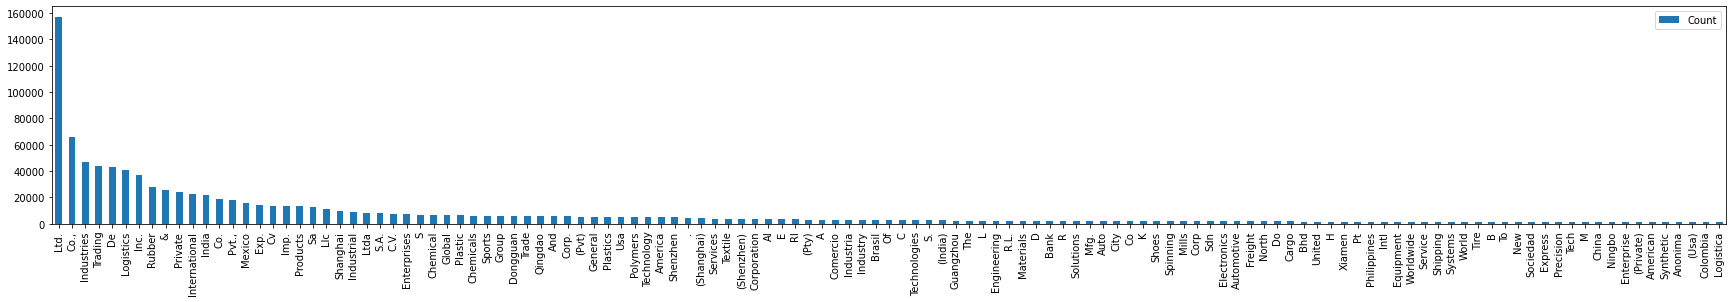

In [ ]:
freq.head(125).plot.bar(figsize=(30, 4))
None

In [ ]:
freq_to_set(freq)

{'Co.,', 'De', 'Industries', 'Ltd.', 'Trading'}

In [ ]:
def is_same_ignored(x: str, y: str, tokenizer=str.split, ignored_words = set()):
    x_words = set(tokenizer(x))
    for word in y.split():
        if word in x_words and word not in ignored_words:
            return 1
    return 0

In [ ]:
def is_same_ignored_regex(x: str, y: str, tokenizer=str.split):
    x_words = set(tokenizer(x))
    ignored_words = [
        "Co\\.,?", "Ltd\\.", "Inc\\.", "Industr.+", "Logistics", "Rubber", "Trading",
        "Products", "International", "Private", "Electronics", "Exp\\.", "Sport?s",
        "Enterprises", "Chemical", "Solutions", "Polymers?", "General", "Global"
    ]
    pattern = f"({'|'.join(ignored_words)})"
    pattern = re.compile(pattern)
    for word in y.split():
        if word in x_words and not pattern.search(word):
            return 1
    return 0

In [ ]:
#is_same("Alxrma Trading Co.", "Mohan Trading Co.")

In [ ]:
#is_same_regex("Alxrma Trading Co.", "Mohan Trading Co.")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def validate(df, method, names = ["name_1", "name_2"], **kwargs):
    def apply(row):
        args = [row[name] for name in names]
        return method(*args, **kwargs)
    y_true = df["is_duplicate"].to_numpy()
    y_pred = df.apply(apply, axis=1).to_numpy()
    a = accuracy_score(y_true, y_pred)
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred)
    return a, p[1], r[1], f[1]

In [ ]:
validate(df, is_same)

(0.6259865533456939,
 0.01635356773800376,
 0.843630399125205,
 0.032085172304445235)

In [ ]:
validate(df, is_same_ignored, ignored_words=freq_to_set(freq))

(0.7441660523202208,
 0.02365897801224537,
 0.839803171131766,
 0.046021437720500664)

In [ ]:
validate(df, is_same_ignored_regex)

(0.863175170091941,
 0.043422208369931714,
 0.8378895571350464,
 0.08256559452615699)

In [ ]:
def func(df, freq, top_ns):
    a_scores, p_scores, r_scores, f_scores = [], [], [], []
    for top_n in top_ns:
        ignored_words = freq_to_set(freq, top_n)
        a, p, r, f = validate(df, is_same_ignored, ignored_words=ignored_words)
        a_scores.append(a)
        p_scores.append(p)
        r_scores.append(r)
        f_scores.append(f)
    return a_scores, p_scores, r_scores, f_scores

In [ ]:
top_ns = [5, 15, 30, 50, 100, 250, 375, 500, 1000, 2000, 4000, 8000]
indexes = list(range(1, len(top_ns) + 1))
a_scores, p_scores, r_scores, f_scores = func(df, freq, top_ns)
max(f_scores)

0.40270680845187135

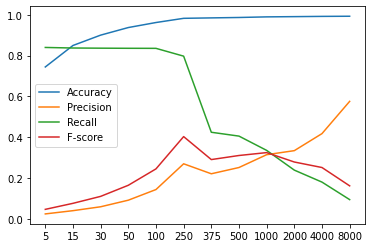

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(indexes, a_scores, label="Accuracy")
ax.plot(indexes, p_scores, label="Precision")
ax.plot(indexes, r_scores, label="Recall")
ax.plot(indexes, f_scores, label="F-score")
ax.set_xticks(indexes)
ax.set_xticklabels(top_ns)
ax.legend()
None

In [ ]:
import nltk
import string
import numpy as np
from numpy import dot
import compress_fasttext
from numpy.linalg import norm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [ ]:
from gensim.models.fasttext import logger
logger.disabled = True

In [ ]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
np.seterr('warn')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
tokenizer = wordpunct_tokenize
trans = str.maketrans("", "", string.punctuation)
stop_words = set(stopwords.words())
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
fasttext = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/ft_cc.en.300_freqprune_400K_100K_pq_300.bin'
)

In [ ]:
def tokens2vec(model, tokens):
    vecs = np.array([model[token] for token in tokens])
    return np.mean(vecs, axis=0)

In [ ]:
def sent2vec(model, tokenizer, sent):
    tokens = pipeline(sent, tokenizer, stop_words, trans)
    return tokens2vec(model, tokens)

In [ ]:
def get_tokens_similarity(model, tokens1, tokens2,):
    v1 = tokens2vec(model, tokens1)
    v2 = tokens2vec(model, tokens2)
    return dot(v1, v2) / max((norm(v1) * norm(v2)), 1e-8)

In [ ]:
def get_sent_similarity(sent1, sent2, model=fasttext, tokenizer=tokenizer):
    v1 = sent2vec(model, tokenizer, sent1)
    v2 = sent2vec(model, tokenizer, sent2)
    return dot(v1, v2) / max((norm(v1) * norm(v2)), 1e-8)

In [ ]:
def is_same_fasttext(tokens1, tokens2, threshold):
    sim = get_tokens_similarity(tokens1, tokens2)
    if sim > threshold:
        return 1
    return 0

In [ ]:
def pipeline(sentence, tokenizer, stop_words, trans):
    filtered_tokens = []
    sentence = sentence.translate(trans)
    tokenized_sent = tokenizer(sentence)
    for token in tokenized_sent:
        if token in stop_words:
            continue
        filtered_tokens.append(token)
    return tuple(filtered_tokens)

In [ ]:
get_sent_similarity("Dow Chemical", "Dow Chemical Pacific")

0.9698149176355546

In [ ]:
get_sent_similarity("Parker Industrials", "Formiline Industria Laminados Ltda")

0.37823499278141376

In [ ]:
# !wget https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz
# !gzip -d fasttext-wiki-news-subwords-300.gz

In [ ]:
# from gensim.models.fasttext import load_facebook_model
# big_model = load_facebook_model("cc.en.300.bin")

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
tokenizer("Xeikon Industrial Co., Ltd. Of Dongguan City")

['Xeikon', 'Industrial', 'Co', '.,', 'Ltd', '.', 'Of', 'Dongguan', 'City']

In [ ]:
tokenizer('ООО"ГЭЛАКСИ КАРГО СЕРВИС"')

['ООО', '"', 'ГЭЛАКСИ', 'КАРГО', 'СЕРВИС', '"']

In [ ]:
ps = PorterStemmer()

In [ ]:
ps.stem("Industries")

'industri'

In [ ]:
ps.stem("Industrial")

'industri'

In [ ]:
stop_words = set(stopwords.words())

In [ ]:
from functools import lru_cache

In [ ]:
def compute(df, model, tokenizer, top_n, names=["name_1_clean", "name_2_clean"]):
    freq = word_frequency(df, tokenizer=tokenizer)
    freq = freq_to_set(freq, top_n)
    stop_words = set(stopwords.words())
    stop_words = stop_words.union(freq)
    trans = str.maketrans("", "", string.punctuation)
    res = df.copy(deep=True)
    names_pair = [
        ("name_1", "name_1_clean", "name_1_tokens"), 
        ("name_2", "name_2_clean", "name_2_tokens")
    ]
    m = lru_cache(None)(lambda s: pipeline(s, tokenizer, stop_words, trans))
    for old_name, name_clean, name_tokens in names_pair:
        res[name_clean] = res[old_name].apply(m)
        res = res[res[name_clean].astype(bool) != False]
        #res[name_tokens] = res[name_clean].apply(lambda tokens: tokens2vec(model, tokens))
    res = res.dropna()
    s2v = lru_cache(None)(model.get_sentence_vector)
    def func(row):
        name_1, name_2 = [row[n] for n in names]
        v1, v2 = s2v(name_1), s2v(name_2)
        return dot(v1, v2) / max((norm(v1) * norm(v2)), 1e-8)
    res["names_sim"] = res.apply(func, axis=1)
    return res

In [ ]:
#nltk_freq = word_frequency(fd, tokenizer=word_tokenize)
#len(freq), len(word_frequency(fd))

In [ ]:
def benchmark(df, model, tokenizer, top_n):
    non_ascii = "[^\x00-\x7F]"
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
    fd = df[df["name_1"].str.lower() != df["name_2"].str.lower()]
    fd = fd[~(fd["name_1"].str.contains(non_ascii) | fd["name_2"].str.contains(non_ascii))]
    fd = compute(fd, model, tokenizer, top_n)
    a_scores, p_scores, r_scores, f_scores = [], [], [], []
    for threshold in thresholds:
        a, p, r, f = validate(
            fd, lambda val: val > threshold, names=["names_sim"]
        )
        a_scores.append(a)
        p_scores.append(p)
        r_scores.append(r)
        f_scores.append(f)
    fig, ax = plt.subplots(1)
    ax.plot(thresholds, a_scores, label="Accuracy")
    ax.plot(thresholds, p_scores, label="Precision")
    ax.plot(thresholds, r_scores, label="Recall")
    ax.plot(thresholds, f_scores, label="F-score")
    ax.legend()
    print(f"Max f-score: {max(f_scores)}")

/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


Max f-score: 0.05384615384615385


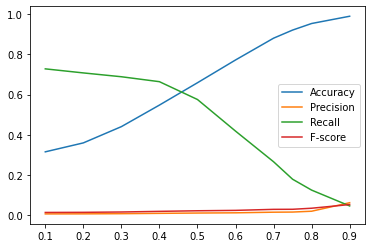

In [ ]:
benchmark(df, fasttext, tokenizer, 0)

/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


Max f-score: 0.3046793242637166


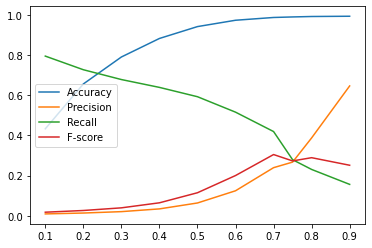

In [ ]:
benchmark(df, fasttext, tokenizer, 250)

/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


Max f-score: 0.35310537334263775


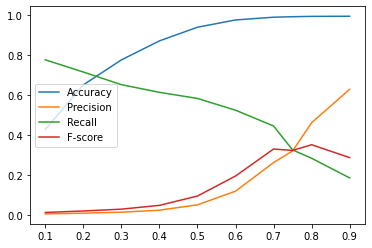

In [ ]:
benchmark(df, fasttext, tokenizer, 500)

/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


Max f-score: 0.19012345679012346


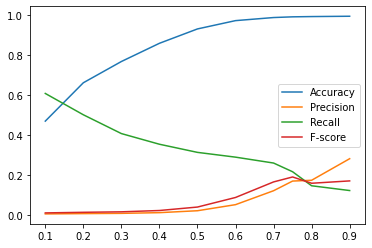

In [ ]:
benchmark(df, fasttext, tokenizer, 2000)

In [ ]:
fd = df[df["name_1"].str.lower() != df["name_2"].str.lower()]
print(len(fd), len(fd["name_1"].unique()))
fd = compute(fd, fasttext, tokenizer, 500)
fd

497789 17631


/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_clean,name_2_clean,names_sim
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko,)","(Enormous,)",0.068913
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex,)","(Technocraft,)",0.456489
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Park)",0.329134
5,6,Wpt Mexico Sa De Cv,Hopkins Mfg. De Mexico S De Rl De Cv,0,1,"(Wpt,)","(Hopkins,)",NaN
7,8,Citibank Korea Inc.,Kyor,0,0,"(Citibank, Korea)","(Kyor,)",0.110140
...,...,...,...,...,...,...,...,...
497812,497813,Highline General Trading Co.,D Donato Trading Srl .,0,1,"(Highline,)","(Donato,)",0.037857
497813,497814,Trinseo API,BATEC GROUP GmbH,0,0,"(Trinseo, API)","(BATEC,)",0.385586
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1,"(Bnd,)","(Zhong, Yue, Liang, Economy)",NaN
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1,"(Kechuan,)","(MG, Stationery)",-0.013724


In [ ]:
validate(fd, lambda val: val > 0.8, names=["names_sim"])

(0.9939074424182675,
 0.46684831970935514,
 0.263050153531218,
 0.33649754500818335)

In [ ]:
validate(fd, lambda val: val > 0.6, names=["names_sim"])

(0.9763481324071764,
 0.1210762331838565,
 0.4836233367451382,
 0.19366738395327393)

In [ ]:
fd[fd["is_duplicate"] == 1]

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_clean,name_2_clean,names_sim
161,162,JX Nippon Oil & Gas Exploration (Brasil) Ltda,JX Nippon Oil & Gas Exploration Technical Serv...,1,1,"(JX, Nippon, Gas, Exploration)","(JX, Nippon, Gas, Exploration)",1.000000
603,604,Pirelli Neumaticos S.A.I.C.,"Pirelli Tyre Co., Ltd.",1,1,"(Pirelli, Neumaticos, SAIC)","(Pirelli,)",0.661781
835,836,Brenntag Australia (Pty) Ltd.,Brenntag Group,1,1,"(Brenntag,)","(Brenntag,)",1.000000
1328,1329,"PAUL BAUDER GMBH & CO KG, BOCHUM PLANT",Paul Bauder ag,1,0,"(PAUL, BAUDER, BOCHUM, PLANT)","(Paul, Bauder, ag)",0.264017
1562,1563,TOTAL CESKA REPUBLIKA s.r.o.,TOTAL FRANCE (ARNAY LE DUC),1,1,"(CESKA, REPUBLIKA, sro)","(FRANCE, ARNAY, LE, DUC)",NaN
...,...,...,...,...,...,...,...,...
495235,495236,Arlanxeo Singapore Pte. Lt,"Arlanxeo Singapore Pte., Ltd. Tearlanxeo Canad...",1,1,"(Arlanxeo, Singapore)","(Arlanxeo, Singapore, Tearlanxeo, 1265, Vidal)",0.747678
495482,495483,"Michelin Siam Co., Ltd.","Shanghai Michelin Warrior Tyre Co., Ltd.",1,1,"(Siam,)","(Warrior,)",0.209468
495936,495937,"Adams Resources Exploration Corporation, Oil A...","Adams Resources Exploration Corporation, Oil A...",1,1,"(Adams, Resources, Exploration, Gas, Assets, C...","(Adams, Resources, Exploration, Gas, Assets, O...",0.845374
496760,496761,Arlanxeo International Group,Arlanxeo Corp.,1,1,"(Arlanxeo,)","(Arlanxeo,)",1.000000


In [ ]:
#fd.to_csv("filtered.csv", index=False)

In [ ]:
fd[(fd["is_duplicate"] == 1) & (fd["names_sim"] > 0.7)]

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_clean,name_2_clean,names_sim
161,162,JX Nippon Oil & Gas Exploration (Brasil) Ltda,JX Nippon Oil & Gas Exploration Technical Serv...,1,1,"(JX, Nippon, Gas, Exploration)","(JX, Nippon, Gas, Exploration)",1.000000
835,836,Brenntag Australia (Pty) Ltd.,Brenntag Group,1,1,"(Brenntag,)","(Brenntag,)",1.000000
1798,1799,Brenntag Peru S.A.C.,Brenntag Group,1,1,"(Brenntag, SAC)","(Brenntag,)",0.736073
2772,2773,Onduline Polska Sp. z o.o.,Onduline S.A.,1,1,"(Onduline, oo)","(Onduline,)",0.719621
2790,2791,Rhino Rugby Ltd.,Rhino Rugby France,1,1,"(Rhino,)","(Rhino, France)",0.727182
...,...,...,...,...,...,...,...,...
494851,494852,Kuraray India Private Ltd.,Kuraray America Inc.,1,1,"(Kuraray,)","(Kuraray,)",1.000000
495235,495236,Arlanxeo Singapore Pte. Lt,"Arlanxeo Singapore Pte., Ltd. Tearlanxeo Canad...",1,1,"(Arlanxeo, Singapore)","(Arlanxeo, Singapore, Tearlanxeo, 1265, Vidal)",0.747678
495936,495937,"Adams Resources Exploration Corporation, Oil A...","Adams Resources Exploration Corporation, Oil A...",1,1,"(Adams, Resources, Exploration, Gas, Assets, C...","(Adams, Resources, Exploration, Gas, Assets, O...",0.845374
496760,496761,Arlanxeo International Group,Arlanxeo Corp.,1,1,"(Arlanxeo,)","(Arlanxeo,)",1.000000


In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3930, done.
remote: Counting objects: 100% (944/944), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 3930 (delta 854), reused 804 (delta 804), pack-reused 2986
Receiving objects: 100% (3930/3930), 8.24 MiB | 11.97 MiB/s, done.
Resolving deltas: 100% (2505/2505), done.


In [ ]:
%cd fastText
!pip install .
%cd ..

/content/fastText
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/fastText
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3155257 sha256=951ea558086c51fcec8485ad4f8f25abfc06aa514a7cea81539df39a4eba4680
  Stored in directory: /tmp/pip-ephem-wheel-cache-wumqhecl/wheels/22/04/6e/b3aba25c1a5845898b5871a0df37c2126cb0cc9326ad0c08e7
Successfully built fasttext
/content


In [ ]:
import fasttext as ft

In [ ]:
t = df[~((df["name_1"].str.contains(non_ascii)) | (df["name_2"].str.contains(non_ascii)))]
data = np.union1d(t["name_1"].unique(), t["name_2"].unique())

In [ ]:
with open("data.txt", "w") as file:
    for line in data:
        file.write(line + "\n")

In [ ]:
trained_model = ft.train_unsupervised("data.txt", dim=200, epoch=10)

In [ ]:
fd = compute(df, trained_model, tokenizer, 0, names=["name_1", "name_2"])
fd

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_clean,name_2_clean,names_sim
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko, Industries, Ltd)","(Enormous, Industrial, Trade, Pvt, Ltd)",0.997024
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex, Industries, Ltd)","(Technocraft, Industries, India, Ltd)",0.984762
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,0,"(Rishichem, Distributors, Pvt, Ltd)","(Dsa,)",0.951121
3,4,Powermax Rubber Factory,Co. One,0,0,"(Powermax, Rubber, Factory)","(Co, One)",0.993440
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Industries, Park, Zhejiang)",0.963176
...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0,"(BITMAT, PRODUCTS)","(The, Goodyear, Tire, Rubber, Company)",0.692081
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1,"(Bnd, Trading, Co, Ltd)","(Zhong, Shan, Yue, Liang, Economy, Trade, Imp,...",0.993256
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1,"(Xeikon, Industrial, Co, Ltd, Of, Dongguan, City)","(Yi, Cheng, Trading, Co, Ltd, Of, Dongguan, City)",0.975751
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1,"(Shanghai, Kechuan, Trading, Co, Ltd)","(Shanghai, MG, Stationery, Inc)",0.900991


In [ ]:
validate(fd, lambda val: val > 0.7, names=["names_sim"])

(0.09230865033275146,
 0.007036862689889707,
 0.8745215965008202,
 0.013961384704013407)

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
class SentenceProcessingPipeline:
    def __init__(self, tokenizer=str.split, stopwords=set(), stemming=False,
                 remove_punkt=True, case=True, default_stopwords=True):
        self.stopwords = set()
        if default_stopwords:
            self.stopwords = set(nltk.corpus.stopwords.words())
        self.stopwords = self.stopwords.union(stopwords)
        self.tokenizer = tokenizer
        self.punkt = lambda s: s
        if remove_punkt:
            trans = str.maketrans("", "", string.punctuation)
            self.punkt = lambda s: s.translate(trans)
            self.stopwords = set([w.translate(trans) for w in self.stopwords])
        self.stemming = lambda s: s
        if stemming:
            ps = PorterStemmer()
            self.stemming = lambda w: ps.stem(w)
            self.stopwords = set([ps.stem(w) for w in self.stopwords])
        self.case = lambda s: s
        if not case:
            self.case = lambda s: s.lower()
            self.stopwords = set([w.lower() for w in self.stopwords])
    @lru_cache(None)
    def __call__(self, sentence):
        filtered_tokens = []
        sentence = self.punkt(sentence)
        sentence = self.case(sentence)
        tokenized_sent = tokenizer(sentence)
        for token in tokenized_sent:
            token = self.stemming(token)
            if token in self.stopwords:
                continue
            filtered_tokens.append(token)
        return tuple(filtered_tokens)
    @classmethod
    def with_df_freq_words(cls, df, top_n, names=["name_1", "name_2"], **kwargs):
        tokenizer = str.split
        if "tokenizer" in kwargs:
            tokenizer = kwargs["tokenizer"]
        freq = word_frequency(df, tokenizer=tokenizer, names=names)
        freq = freq_to_set(freq, top_n)
        return cls(stopwords=freq, **kwargs)

In [ ]:
def clear(df):
    non_ascii = "[^\x00-\x7F]"
    df = df[df["name_1"] != df["name_2"]]
    df = df[df["name_1"].str.lower() != df["name_2"].str.lower()]
    df = df[~(df["name_1"].str.contains(non_ascii) | 
              df["name_2"].str.contains(non_ascii))]
    return df

In [ ]:
dfc = clear(df)

In [ ]:
def tokenize(dfc, top_n, names=["name_1", "name_2"], **kwargs):
    spp = SentenceProcessingPipeline.with_df_freq_words(
        dfc, top_n, names=names, **kwargs
    )
    res = df.copy(deep=True)
    for name in names:
        column_name = f"{name}_tokens"
        res[column_name] = res[name].apply(spp)
        res = res[res[column_name].astype(bool) != False]
    return res

In [ ]:
dfct = tokenize(dfc, 250)
dfct

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_tokens,name_2_tokens
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko,)","(Enormous,)"
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex,)","(Technocraft,)"
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Park)"
5,6,Wpt Mexico Sa De Cv,Hopkins Mfg. De Mexico S De Rl De Cv,0,1,"(Wpt,)","(Hopkins,)"
7,8,Citibank Korea Inc.,Kyor,0,0,"(Citibank, Korea)","(Kyor,)"
...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0,"(BITMAT, PRODUCTS)","(Goodyear, Company)"
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1,"(Bnd,)","(Zhong, Shan, Yue, Liang, Economy)"
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1,"(Xeikon,)","(Yi, Cheng)"
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1,"(Kechuan,)","(MG, Stationery)"


In [ ]:
import pylev

In [ ]:
def compute_v2(dfct, method):
    res = dfct.copy(deep=True)
    res["names_sim"] = res.apply(method, axis=1)
    res = res.dropna()
    return res

In [ ]:
class Base:
    def __init__(self, names=["name_1_tokens", "name_2_tokens"]):
        self.names = names
    def calc(self, x_words, y_words):
        raise NotImplementedError()
    def __call__(self, row):
        name_1, name_2 = [row[n] for n in self.names]
        return self.calc(name_1, name_2)

In [ ]:
class Model(Base):
    def __init__(self, model):
        super().__init__()
        self.model = model
    @lru_cache(None)
    def s2v(self, tokens):
        return self.model.get_sentence_vector(tokens)
    def calc(self, x_words, y_words):
        v1, v2 = self.s2v(x_words), self.s2v(y_words)
        return dot(v1, v2) / max((norm(v1) * norm(v2)), 1e-8)
    def __call__(self, row):
        name_1, name_2 = [row[n] for n in self.names]
        return self.calc(name_1, name_2)

In [ ]:
class Rule(Base):
    def __init__(self):
        super().__init__()
    def calc(self, x_words, y_words):
        counter = 0
        for word in x_words:
            if word in y_words:
                counter += 1
        return counter / max(len(x_words), len(y_words))
    def __call__(self, row):
        name_1, name_2 = [row[n] for n in self.names]
        return self.calc(name_1, name_2)

In [ ]:
class Levenshtein(Base):
    def __init__(self):
        super().__init__()
        self.distance = lru_cache()(pylev.levenshtein)
    def calc(self, x_words, y_words):
        distance = self.distance(x_words, y_words)
        return 1 - distance/max(len(x_words), len(y_words))
    def __call__(self, row):
        name_1, name_2 = [row[n] for n in self.names]
        return self.calc(name_1, name_2)

In [ ]:
model = Model(fasttext)
res = compute_v2(dfct, model)
res

/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_tokens,name_2_tokens,names_sim
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko,)","(Enormous,)",0.068913
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex,)","(Technocraft,)",0.456489
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Park)",0.329134
7,8,Citibank Korea Inc.,Kyor,0,0,"(Citibank, Korea)","(Kyor,)",0.110140
8,9,Prettl Electric Del Bajio S.A. De C.V.,Bva Inc.,0,0,"(Prettl, Electric, Bajio)","(Bva,)",0.305529
...,...,...,...,...,...,...,...,...
497812,497813,Highline General Trading Co.,D Donato Trading Srl .,0,1,"(Highline,)","(Donato,)",0.037857
497813,497814,Trinseo API,BATEC GROUP GmbH,0,0,"(Trinseo, API)","(BATEC, GROUP)",0.398726
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0,"(BITMAT, PRODUCTS)","(Goodyear, Company)",0.099312
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1,"(Xeikon,)","(Yi, Cheng)",0.027852


In [ ]:
rule = Rule()
res = compute_v2(dfct, rule)
res

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_tokens,name_2_tokens,names_sim
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko,)","(Enormous,)",0.0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex,)","(Technocraft,)",0.0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Park)",0.0
5,6,Wpt Mexico Sa De Cv,Hopkins Mfg. De Mexico S De Rl De Cv,0,1,"(Wpt,)","(Hopkins,)",0.0
7,8,Citibank Korea Inc.,Kyor,0,0,"(Citibank, Korea)","(Kyor,)",0.0
...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0,"(BITMAT, PRODUCTS)","(Goodyear, Company)",0.0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1,"(Bnd,)","(Zhong, Shan, Yue, Liang, Economy)",0.0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1,"(Xeikon,)","(Yi, Cheng)",0.0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1,"(Kechuan,)","(MG, Stationery)",0.0


In [ ]:
liv = Levenshtein()
res = compute_v2(dfct, liv)
res

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_tokens,name_2_tokens,names_sim
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko,)","(Enormous,)",0.0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex,)","(Technocraft,)",0.0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Park)",0.0
5,6,Wpt Mexico Sa De Cv,Hopkins Mfg. De Mexico S De Rl De Cv,0,1,"(Wpt,)","(Hopkins,)",0.0
7,8,Citibank Korea Inc.,Kyor,0,0,"(Citibank, Korea)","(Kyor,)",0.0
...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0,"(BITMAT, PRODUCTS)","(Goodyear, Company)",0.0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1,"(Bnd,)","(Zhong, Shan, Yue, Liang, Economy)",0.0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1,"(Xeikon,)","(Yi, Cheng)",0.0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1,"(Kechuan,)","(MG, Stationery)",0.0


In [ ]:
def validate_v2(res, threshold):
    y = lambda val: val > threshold
    y_true = res["is_duplicate"].to_numpy()
    y_pred = res["names_sim"].apply(y).to_numpy()
    a = accuracy_score(y_true, y_pred)
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred)
    return a, p[1], r[1], f[1]

In [ ]:
def benchmark_v2_core(dfc, method, top_n, thresholds, ax=plt, **kwargs):
    dfct = tokenize(dfc, top_n, **kwargs)
    res = compute_v2(dfct, method)
    a_scores, p_scores, r_scores, f_scores = [], [], [], []
    for threshold in thresholds:
        a, p, r, f = validate_v2(res, threshold)
        a_scores.append(a)
        p_scores.append(p)
        r_scores.append(r)
        f_scores.append(f)
    ax.plot(thresholds, a_scores, label="Accuracy")
    ax.plot(thresholds, p_scores, label="Precision")
    ax.plot(thresholds, r_scores, label="Recall")
    ax.plot(thresholds, f_scores, label="F-score")
    ax.legend()
    print(f"Max f-score: {max(f_scores)}")

In [ ]:
def benchmark_v2(dfc, method, top_n):
    fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
    for i, kwargs in enumerate(({}, {"stemming": True, "case": False})):
        benchmark_v2_core(dfc, method, top_n, thresholds, ax=ax[i], **kwargs)

Max f-score: 0.3397601335964779


/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py:1128: RuntimeWarning: invalid value encountered in true_divide
  return word_vec / np.linalg.norm(word_vec)


Max f-score: 0.40938386182005676


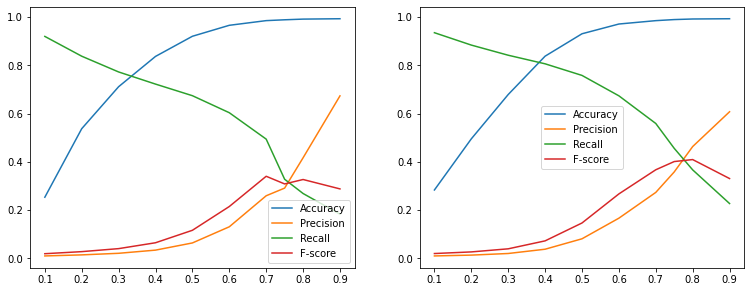

In [ ]:
benchmark_v2(dfc, model, 250)

Max f-score: 0.3167363486633726
Max f-score: 0.35489833641404805


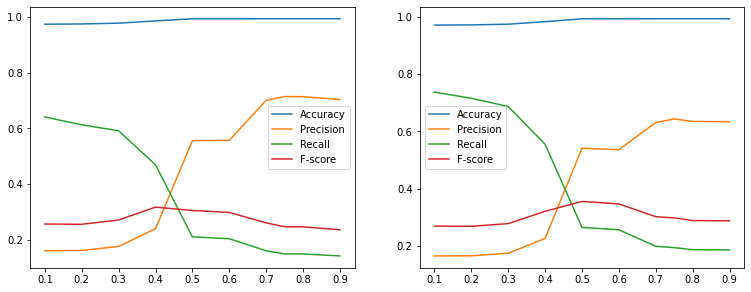

In [ ]:
benchmark_v2(dfc, rule, 250)

Max f-score: 0.32171511245560963
Max f-score: 0.3499866417312317


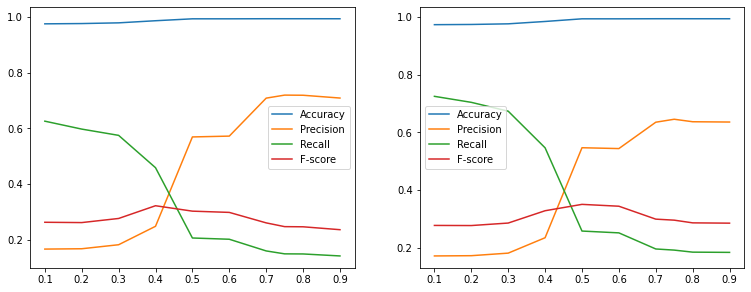

In [ ]:
benchmark_v2(dfc, liv, 250)

In [ ]:
res[(res["is_duplicate"] == 1) & (res["names_sim"] > 0.7)]

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_tokens,name_2_tokens,names_sim
161,162,JX Nippon Oil & Gas Exploration (Brasil) Ltda,JX Nippon Oil & Gas Exploration Technical Serv...,1,1,"(JX, Nippon, Oil, Gas, Exploration)","(JX, Nippon, Oil, Gas, Exploration, Technical)",0.833333
3276,3277,JX Nippon Oil & Gas Exploration (Brasil) Ltda,"JX Nippon Oil & Gas Exploration (Sarawak), Ltd",1,1,"(JX, Nippon, Oil, Gas, Exploration)","(JX, Nippon, Oil, Gas, Exploration, Sarawak)",0.833333
3842,3843,Dow Chemical,Dow Chemical Pacific,1,1,"(Dow,)","(Dow,)",1.000000
4145,4146,Toyo Trans Inc.,Toyo Tire North,1,1,"(Toyo,)","(Toyo,)",1.000000
5117,5118,"ООО""ИМПОРТ МОДА""","ООО""ИМПОРТ МОДА""",1,1,"(ОООИМПОРТ, МОДА)","(ОООИМПОРТ, МОДА)",1.000000
...,...,...,...,...,...,...,...,...
488736,488737,"ООО""НОВЫЙ МИР""","ООО""НОВЫЙ МИР""",1,1,"(ОООНОВЫЙ, МИР)","(ОООНОВЫЙ, МИР)",1.000000
489388,489389,Sika Sa,Sika S A.,1,1,"(Sika,)","(Sika,)",1.000000
494851,494852,Kuraray India Private Ltd.,Kuraray America Inc.,1,1,"(Kuraray,)","(Kuraray,)",1.000000
496760,496761,Arlanxeo International Group,Arlanxeo Corp.,1,1,"(Arlanxeo,)","(Arlanxeo,)",1.000000


In [ ]:
!pip install sentence-transformers > /dev/null

In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, util

In [ ]:
sbert = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
emb1 = sbert.encode("JX Nippon Oil & Gas Exploration (Brasil) Ltda")
emb2 = sbert.encode("JX Nippon Oil & Gas Exploration (Sarawak), Ltd")

In [ ]:
util.cos_sim(emb1, emb2)

tensor([[0.8110]])

In [ ]:
import torch

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
class Transformer(Base):
    def __init__(self, model=SentenceTransformer('all-MiniLM-L6-v2')):
        super().__init__()
        self.model = model
    @lru_cache(None)
    def t2v(self, tokens):
        sent = " ".join(tokens)
        return self.model.encode(sent)
    def calc(self, x_tokens, y_tokens):
        emb1 = self.t2v(x_tokens)
        emb2 = self.t2v(y_tokens)
        return util.cos_sim(emb1, emb2)[0][0].item()
    def __call__(self, row):
        name_1, name_2 = [row[n] for n in self.names]
        return self.calc(name_1, name_2)

In [ ]:
sbert = Transformer()
res = compute_v2(dfct, sbert)
res

,pair_id,name_1,name_2,is_duplicate,y_pred,name_1_tokens,name_2_tokens,names_sim
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1,"(Iko,)","(Enormous,)",0.197920
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1,"(Apcotex,)","(Technocraft,)",0.283467
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0,"(Tress, AS)","(Longyou, Park)",0.242203
5,6,Wpt Mexico Sa De Cv,Hopkins Mfg. De Mexico S De Rl De Cv,0,1,"(Wpt,)","(Hopkins,)",0.194845
7,8,Citibank Korea Inc.,Kyor,0,0,"(Citibank, Korea)","(Kyor,)",0.218890
...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0,"(BITMAT, PRODUCTS)","(Goodyear, Company)",0.199131
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1,"(Bnd,)","(Zhong, Shan, Yue, Liang, Economy)",0.198411
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1,"(Xeikon,)","(Yi, Cheng)",0.323566
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1,"(Kechuan,)","(MG, Stationery)",0.069815


In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

Max f-score: 0.23469119579500655


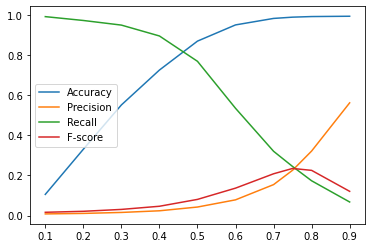

In [ ]:
benchmark_v2_core(dfc, sbert, 0, thresholds, case=False)

Max f-score: 0.22968477744337085
Max f-score: 0.18625647884969065


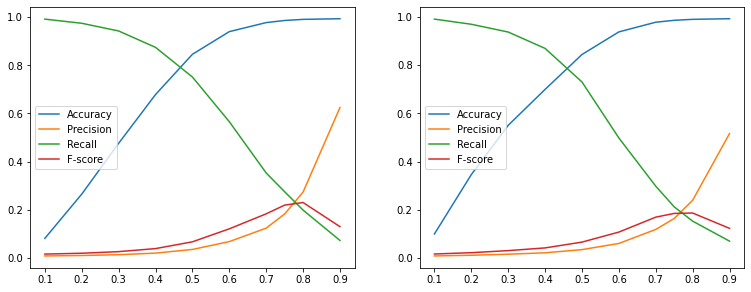

In [ ]:
benchmark_v2(dfc, sbert, 0)

Max f-score: 0.42666666666666675
Max f-score: 0.3944153577661431


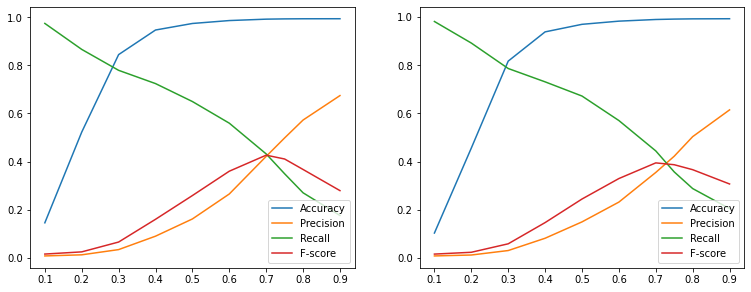

In [ ]:
benchmark_v2(dfc, sbert, 250)

Max f-score: 0.44617932339720845


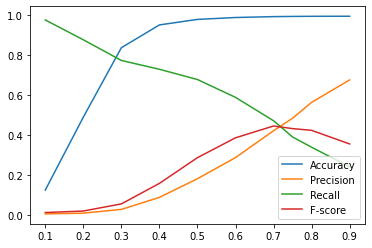

In [ ]:
benchmark_v2_core(dfc, sbert, 500, thresholds)

Max f-score: 0.357830271216098


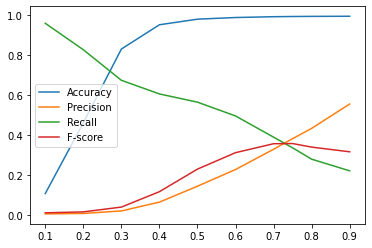

In [ ]:
benchmark_v2_core(dfc, sbert, 1000, thresholds)

In [ ]:
dfc

,pair_id,name_1,name_2,is_duplicate,y_pred
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,1
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,1
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,0
3,4,Powermax Rubber Factory,Co. One,0,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0,0
...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,1
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,1
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0,1


In [ ]:
def class_distributions_plot(dfc):
    res = dfc["is_duplicate"].value_counts()
    x = res.index.to_list()
    y = res.to_numpy()
    plt.bar(x, y)
    return y / len(dfc)

array([0.99299234, 0.00700766])

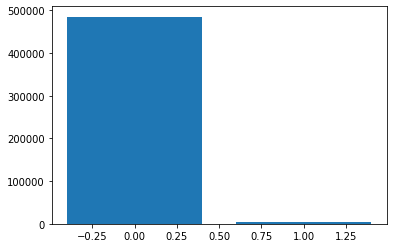

In [ ]:
class_distributions_plot(dfc)

In [ ]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from torch.utils.data import WeightedRandomSampler, Dataset, DataLoader
from sentence_transformers import losses
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator

In [ ]:
def class_distributions(dfc):
    y = dfc["is_duplicate"].value_counts().to_numpy()
    class_weights = len(dfc) / y
    return class_weights

In [ ]:
class CompanyNamesDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        label = row["is_duplicate"]
        name_1, name_2 = row["name_1"], row["name_2"]
        return InputExample(texts=[name_1, name_2], label=float(label))
    def __len__(self):
        return len(self.data.index)

In [ ]:
train_data, test_data = train_test_split(dfc, test_size=0.2)
len(train_data), len(test_data)

(391000, 97751)

In [ ]:
train_dataset = CompanyNamesDataset(train_data)
test_dataset = CompanyNamesDataset(test_data)

In [ ]:
size = int(len(train_dataset) / 10)
train_class_weights = class_distributions(train_data)
train_item_weights = [train_class_weights[l] for l in train_data["is_duplicate"]]
wrs = WeightedRandomSampler(train_item_weights, size, replacement=True)
train_dataloader = DataLoader(train_dataset, sampler=wrs, batch_size=1)

In [ ]:
train_model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
train_loss = losses.CosineSimilarityLoss(train_model)

In [ ]:
a = np.array([(*item.texts, item.label) for item in test_dataset])
sentences1 = a[:, 0]
sentences2 = a[:, 1]
scores = a[:, 2].astype(float)

In [ ]:
evaluator = EmbeddingSimilarityEvaluator(sentences1, sentences2, scores)

In [ ]:
def callback(score, epoch, steps):
    print(score, epoch, steps)

In [ ]:
train_model.fit(
    train_objectives=[(train_dataloader, train_loss)], callback=callback,
    epochs=1, warmup_steps=100, evaluator=evaluator, evaluation_steps=5000
)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/39100 [00:00<?, ?it/s]

0.14156009413536652 0 5000
0.14197171326407457 0 10000
0.14217095042935207 0 15000
0.14226083289802346 0 20000
0.14225151312029433 0 25000
0.14226874218649366 0 30000
0.14205060621672513 0 35000
0.1419903725910963 0 -1


In [ ]:
train_model_test = Transformer(train_model)

Max f-score: 0.665008609144825


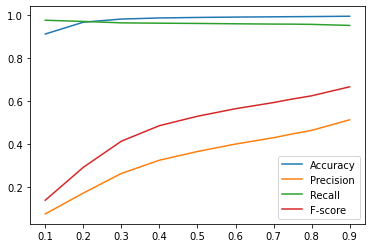

In [ ]:
benchmark_v2_core(dfc, train_model_test, 0, thresholds, remove_punkt=False)

Max f-score: 0.669611986169804


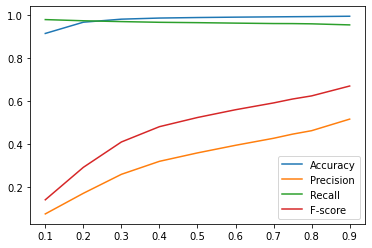

In [ ]:
benchmark_v2_core(test_data, train_model_test, 0, thresholds, 
                  remove_punkt=False, default_stopwords=False)

In [ ]:
train_model.save("model")

In [ ]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/2_Normalize/ (stored 0%)
  adding: model/README.md (deflated 55%)
  adding: model/modules.json (deflated 62%)
  adding: model/sentence_bert_config.json (deflated 4%)
  adding: model/pytorch_model.bin (deflated 8%)
  adding: model/tokenizer.json (deflated 71%)
  adding: model/1_Pooling/ (stored 0%)
  adding: model/1_Pooling/config.json (deflated 47%)
  adding: model/vocab.txt (deflated 53%)
  adding: model/config.json (deflated 48%)
  adding: model/tokenizer_config.json (deflated 53%)
  adding: model/special_tokens_map.json (deflated 42%)
  adding: model/config_sentence_transformers.json (deflated 27%)


In [ ]:
idx = 161
n1, n2 = dfct.loc[idx]["name_1_tokens"], dfct.loc[idx]["name_2_tokens"]
n1, n2, rule.calc(n1, n2)

In [ ]:
liv = Levenshtein()
a = "The patient tolerated this ."
b = "The patient tolerated ."
a = tuple(a.split(" "))
b = tuple(b.split(" "))
liv.calc(a, b)

In [ ]:
len(stopwords.words()), len(set(stopwords.words()))

In [ ]:
spp = SentenceProcessingPipeline()
spp("My boba is aboba. (cringe)")

In [ ]:
spp = SentenceProcessingPipeline(stemming=True)
spp("Stemming increases recall while harming precision")

In [ ]:
l2c = defaultdict(int)
for X, Y in dataloader:
    x, y = X, Y[0].item()
    l2c[y] += 1
l2c